## Decision Tree Regression with AdaBoost

## preparing data

In [1]:
# Preparing The  data
import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Training and prediction with DecisionTree and AdaBoost Regressors

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

## plotting the results

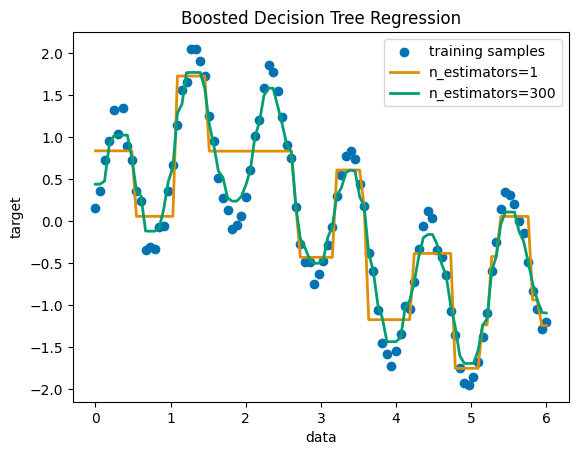

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# Conclusión teórica sobre regresión lineal
La regresión lineal busca estimar la media condicional del variable objetivo dado el conjunto de características, minimizando la suma de los errores al cuadrado (MSE). Este enfoque produce un estimador fácilmente interpretable y computacionalmente eficiente, pero en espacios de alta dimensión o cuando la relación real es no lineal, tenderá al sobreajuste o al subajuste, por lo que a menudo se complementa con técnicas de regularización como Ridge o Lasso para controlar la varianza del modelo.

# Conclusión sobre el uso de la librería scikit-learn
Scikit-learn ofrece una API coherente y sencilla para implementar modelos de ensamble como AdaBoostRegressor, que permite envolver cualquier regresor base  y ajustar parámetros clave. Gracias a esta uniformidad, es trivial comparar el rendimiento de un estimador simple frente a su versión ensablada, facilitando el prototipado y la validación de distintas estrategias de modelado. 

# Contextualizacion
En el presente ejemplo se genera un conjunto de datos sintético en el cual la variable dependiente está definida por una combinación de funciones senoales, a la que se añade ruido gaussiano. Un modelo lineal convencional resulta insuficiente para capturar la naturaleza oscilatoria inherente a dichos datos. Al implementar el algoritmo AdaBoostRegressor sobre árboles de decisión con baja profundidad, el ensamblado de múltiples modelos débiles incrementa de manera significativa la capacidad del modelo para ajustarse a patrones no lineales en presencia de ruido. Este enfoque es análogo a escenarios reales, tales como la predicción de series temporales con componentes estacionales o la modelización de fenómenos cíclicos en ámbitos como la ingeniería y las finanzas.